# ICS 235 
### Name: Zian Zeng

# Lossy image compression using PCA  

In this project, we use Principal Component Analysis to compress an image of baby yoda and we only have a single picture to compress. It means that we have a single sample, and n_pixels features. This is a problem if we want to efficiently represent our data with PCA. Our approach will therefore consider our image as a sample by feature matrix, where each row of the image is a sample and the columns are features. Note that we could have chosen equivalently to do the contrary (samples as columns and features as rows).

In this project, we refer to the "original space" the space of images, and the "PCA space" the space of images after PCA decomposition. The approach we are taking is to represent our image in the PCA space with a limited number of components. We want to select the smallest number of components that will preserve the image quality.

## Loading the data

We first need to load the image. We use PIL (Python Imaging Library) to convert our image into a numpy array.

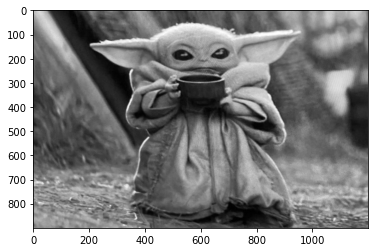

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = Image.open("data/baby_yoda.jpeg", "r") # load the image
img = img.convert("L") # convert to grayscale

img_npy = np.array(img)

plt.imshow(img_npy, aspect="auto", cmap="gray")

> 1. 1. Run a Principal Components Analysis on the image with 50 components. 
   2. Display the explained variance in a plot, where the x-axis is the component ID and the y-axis is the cumulative explained variance ratio for this component. 

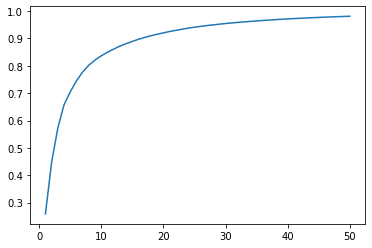

We need 49 of components to explain 90% of the data variance. 


In [3]:

pca = PCA(n_components=50)
pca.fit(img_npy)

#get cumulative explained variance ratio and number of components to explain 90% of the data variance
cum_explained_var = []

cum_explained_var.append(pca.explained_variance_ratio_[0])
num_com_explain90 = 0

for i in range(1, len(pca.explained_variance_ratio_)):
    cum_explained_var.append(pca.explained_variance_ratio_[i] + cum_explained_var[i-1])
    if (cum_explained_var[i] > 0.9):
        num_com_explain90 = i
        
plt.plot(range(1,51), cum_explained_var)
plt.show()

print("We need " + str(num_com_explain90) + " of components to explain 90% of the data variance. ")


> 2. 
    1. Compute the compressed image (its PCA representation). 
      2. Plot the inverse transform of the compressed image.

(900, 1200)
(900, 50)
The ratio between the size of the compressed image and the original image is 24.0


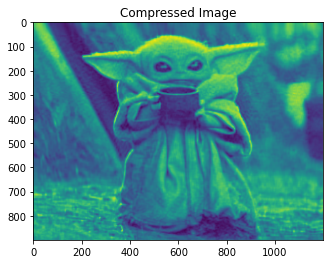

In [13]:


X_pca = pca.transform(img_npy)

X_recovered = pca.inverse_transform(X_pca)

plt.title("Compressed Image")
plt.imshow(X_recovered)

print(img_npy.shape)
print(X_pca.shape)

ratio = img_npy.shape[1] / X_pca.shape[1]
print("The ratio between the size of the compressed image and the original image is " + str(ratio))

> 3. Since we want to visually inspect the compressed images to fine-tune the number of components, we evaluate the impact of the number of components on image quality by plotting in a single plot the original image and the result of compression for a varying number of components from 5 to 40 with a step of 5. In this way, each subplot represents an image for a given number of components. 

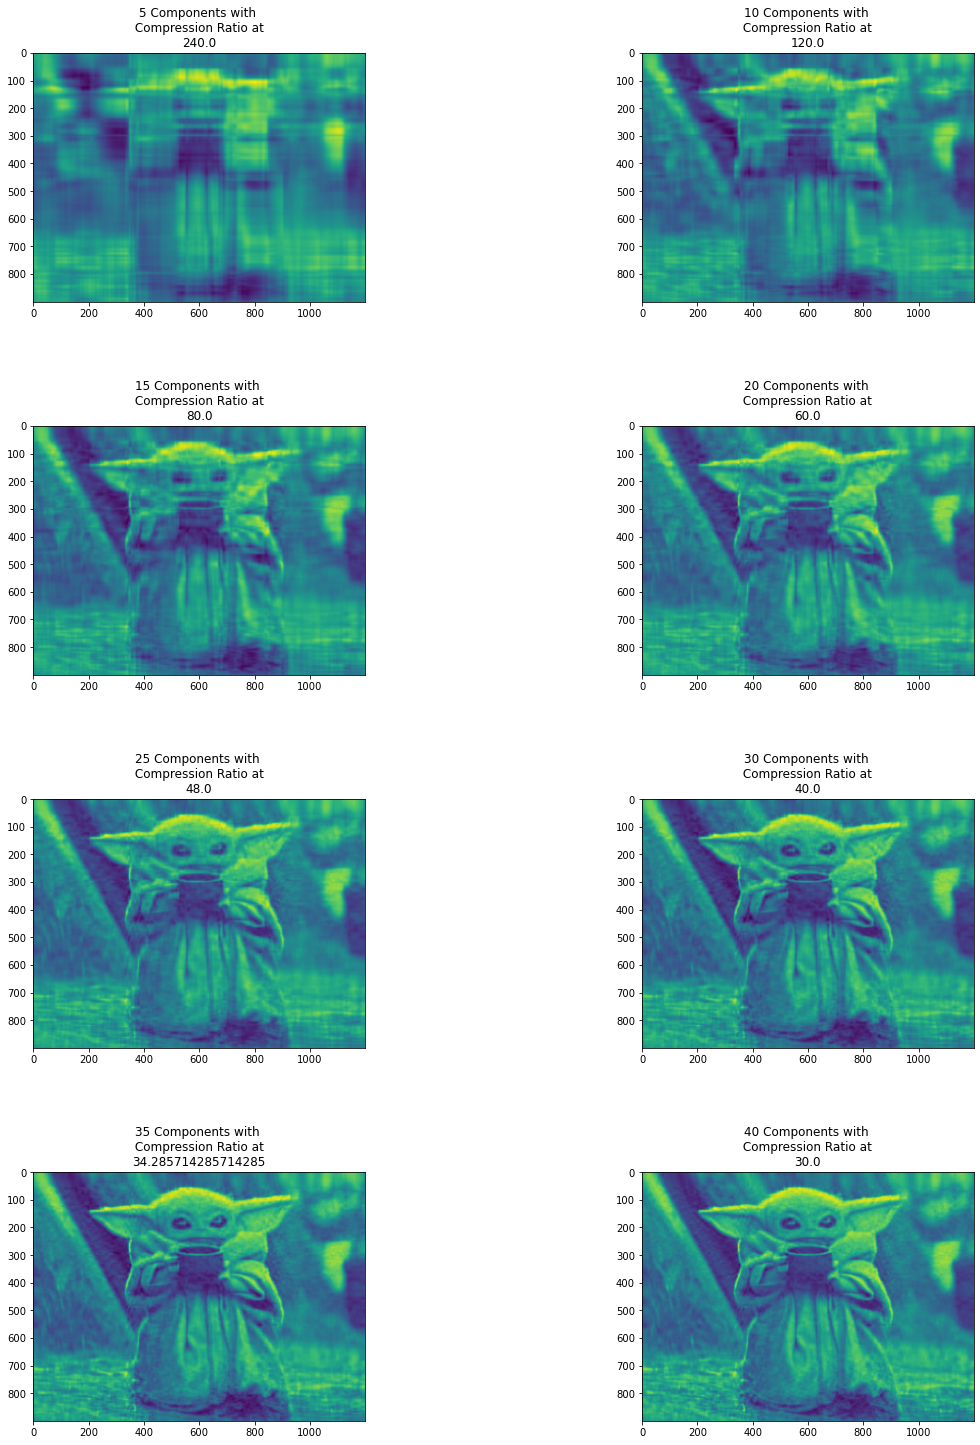

In [14]:

range_num_of_compocomponents = range(5,45,5)

fig = plt.figure(figsize=(20,10))

#  Subplots
plot_pos = 421

for i in range_num_of_compocomponents:
    #build the model and get the ratio
    pca = PCA(n_components=i)
    pca.fit(img_npy)
    X_pca = pca.transform(img_npy)
    X_recovered = pca.inverse_transform(X_pca)
    ratio = img_npy.shape[1] / X_pca.shape[1] 
    
    #plot the compressed image
    plt.subplot(plot_pos)
    plt.title(str(i) + ' Components with \n Compression Ratio at \n' + str(ratio))
    plt.imshow(X_recovered)
    plot_pos += 1
    plt.subplots_adjust(bottom=0.1, top=2, hspace=0.5)
    
plt.show()